In [4]:
# Initialize Otter
import otter
grader = otter.Notebook("Linear systems - Poisson equation.ipynb")

# Matrix Analysis 2024 - EE312

## Week 6 - Discrete Poisson equation 
[LTS2](https://lts2.epfl.ch)

### Objectives
Apply your knowledge about linear systems to Poisson equation resolution.

## Poisson equation
Let $u,v \in \mathbb{R}^n$  represent a physical quantity $f$ and $g: \mathbb{R} \mapsto \mathbb{R}$ sampled at $n$ equi-spaced locations $x_i$, i.e $u_i = f(x_i)$, $v_i = g(x_i)$. 

Let us assume that the underlying continuous object satisfies the Poisson equation: $\frac{d^2}{dx^2} f (x)= g(x)$ with constraints $f(x_j) = y_j$ for a subset of $m$ locations $j \in \{i_1, \ldots i_m \}$. 

We will assume that **all the $i_k$ are distinct**.

This equation governs a number of physical principles, e.g. gravity, fluid mechanics and electrostatics. In the latter we have $\Delta \varphi = -\frac{\rho}{\varepsilon}$, where $\Delta$ is the Laplacian operator $(\frac{d^2}{dx^2} + \frac{d^2}{dy^2} + \frac{d^2}{dz^2})$, $\varphi$ is the electric potential, $\rho$ the density of electric charges and $\varepsilon$ the electric permittivity.

---

#### For the sake of simplicity, we will only consider the 1D case.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<!-- BEGIN QUESTION -->

1. Write down a matrix equation for the discrete version of $\frac{d^2}{dx^2} f (x)= g(x)$, using the finite-difference approximation of the derivative $\frac{d^2}{dx^2} f  = f(x_{k+1}) - 2f(x_k) +f(x_{k-1})$. For the boundary conditions we will make the assumption that $x_{-1}=x_0$ and $x_{n-1}=x_n$ (also referred to as Dirichlet boundary conditions)

What is the rank of the corresponding matrix $D$ ? 

The dim is N-1, so the rank is N-1.

<!-- END QUESTION -->

<Your answers here>

2. Implement a function that creates the $D$ matrix (also called Laplacian). The [diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) function in numpy might be useful.

In [36]:
def lapl_matrix(N):

    main=np.diag(-2*np.ones(N),0)+np.diag(np.ones(N-1),1)+np.diag(np.ones(N-1),-1)
    main[0,0]=-1
    main[-1,-1]=-1
    
    return main


In [37]:
grader.check("q2")

q2 results: All test cases passed!
q2 - 1 message: Good, results seem correct

<!-- BEGIN QUESTION -->

3. Write down a matrix equation for the discrete version of $f(x_j) = y_j$. What is the rank of the corresponding matrix $B$ ?

it is the number of lines with non-zero elements

<!-- END QUESTION -->

4. Implement a function that creates matrix $B$

In [52]:
def b_matrix(N, idx_list): # idx_list is a list of valid indices, e.g. N=5, idx_list=[1,3]
    return np.eye(N)[idx_list]

In [53]:
grader.check("q4")

q4 results: All test cases passed!
q4 - 1 message: Good, results seem correct

<!-- BEGIN QUESTION -->

3. Write down a matrix equation for the full problem (Hint: Consider the matrix $C=\begin{pmatrix}D\\B\end{pmatrix}$). Discuss the rank of the matrix and deduce a way to numerically solve the linear system. Implement a function that returns matrix $C$.

_Type your answer here, replacing this text._

In [59]:
def c_matrix(D, B):
    return np.vstack((D, B))
    

In [49]:
grader.check("q4")

q4 results: All test cases passed!
q4 - 1 message: Good, results seem correct

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

5. What explicit formula can you use to compute the pseudo-inverse of $C$ (justify)?

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

6. Implement a function that return the solution of the problem. You can either use the formula above (you may then use the [linalg.inv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) or compute the pseudo-inverse using [linalg.pinv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html).

In [71]:
# v is a vector of size N
# u is a vector of size len(idx_list)
def solve_poisson(N, v, idx_list, u): 


    D = lapl_matrix(N)
    B = b_matrix(N, idx_list)
    C = c_matrix(D, B)

    x = np.concatenate((v, u))
    
    return np.linalg.pinv(C) @ x

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

7. Let us now consider the solutions of the particular case $g(x) = 0, \forall x\in\mathbb{R}$. What are the analytical solutions that would solve Poisson equation ?

All functions of type $f(x) = ax +by+cz+d$

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Let us verify that our implementation of the solution works with a small example. Fill the values for $u$ s.t. they belong to the solution space.

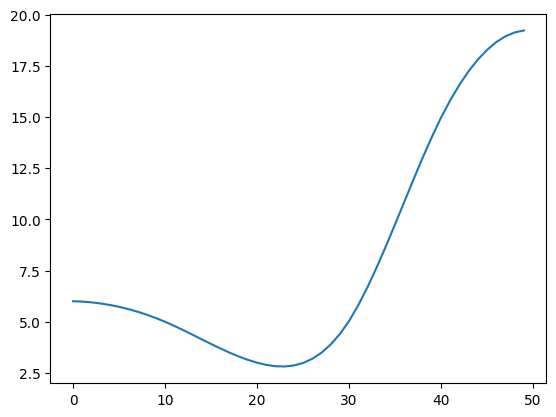

In [74]:
N = 50
v = np.zeros(N)
idx_list = [10, 20, 30, 40]

u = [5,3,5,15]# np.ones(len(idx_list))
sol = solve_poisson(N, v, idx_list, u)
plt.plot(sol) # plot the result

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

9. Are the results conform to what we expected ? What happens near the boundaries ?

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

10. Let us use a step function for $f$ and try to solve the system

In [ ]:
idx_list = [10, 20, 30, 40]
u2 = [1, 1, -1, -1]
sol2 = solve_poisson(N, v, idx_list, u2)
plt.scatter(idx_list, u2, marker='+', color='r')
plt.plot(sol2)

What do you observe and what is the reason for that ? 

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

11. Let us now consider the application of the Poisson equation to electrostatic. Knowing a distribution of electric charges, we can solve it to compute the electric potential. The distribution of electric charges will be very simple, consisting of two punctual charges

In [ ]:
N = 50
v3 = np.zeros(N)
v3[10] = 1
v3[40] = 1
plt.plot(v3)

- What are the analytical solutions for this problem ? (remember the discrete derivative of a step function is a Dirac function, i.e. 0 everywhere except at one point where it is 1). 
- Plot the analytical solution
- Compute and plot the numerical solution
- What do you observe ? 

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
# Plot analytical solution
...

In [ ]:
idx_list = [10, 20, 30, 40]
u3 = [1, 1, 1, 1]
sol3 = solve_poisson(N, v3, idx_list, u3)
plt.scatter(idx_list, u3, marker='+', color='r')
plt.plot(sol3)

In [ ]:
# check the 2nd derivative of the solution computed
...

<!-- END QUESTION -->

